In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [7]:
tb=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Python/linearR.xlsx')

In [8]:
tb

,no. of tv ads,no. of car sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [17]:
x=tb['no. of tv ads']
y=tb['no. of car sold']

In [18]:
import statsmodels.api as s
x2=s.add_constant(x)
model=sm.OLS(y,x2)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        no. of car sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sun, 07 Jun 2020   Prob (F-statistic):             0.0190
Time:                        17:42:03   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0000      2.366      4.226

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [19]:
e=result.resid
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [20]:
np.std(e)

1.6733200530681507

Maximum Likelihood Function

In [21]:
from scipy.optimize import minimize
def lik(parameters):
    m=parameters[0]
    b=parameters[1]
    sigma=parameters[2]
    for i in np.arange(0,len(x)):
        y_exp=m + x + b
    L=(len(x)/2 + np.log(2 + np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
           (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L       
            
            

In [22]:
lik_model=minimize(lik,np.array([2,2,2]),method='Nelder-Mead')

In [23]:
lik_model.x

array([14.0391033 ,  3.96090093,  3.94967373])

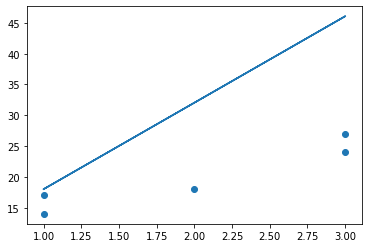

In [24]:
plt.scatter(x,y)
plt.plot(x,lik_model['x'][0] * x + lik_model['x'][1])
plt.show()

In [25]:
minimize?